<a href="https://colab.research.google.com/github/ristaangdembay/Assignments-BDA58/blob/main/Project_5_Target_Customer_Segmentation_for_Retail_Business(Rista_Angdembay).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 5 : Target Customer Compass segmentation for Retail Business

## 1. Project Scope
* <b>Objective</b> :  Perform clustering analysis on the "Mall Customers" dataset to identify customer segments for targeted marketing strategies.

* <b>Key Deliverable</b>:  Clustering results, visualizations, Jupyter Notebook with code and documentation.

* <b>Techniques Used</b>: Unsupervised learning (K-Means, hierarchical clustering), data visualization.

* <b> Expected Outcome</b>: Segmented customer groups with actionable marketing insights.


## 2. Roles and Responsibilities
* <b>Project Lead/Manager:</b> Oversees project execution, timelines, and communication.

* <b>Data Scientist/Analyst:</b> Responsible for data preparation, clustering implementation, and analysis.

* <b>Developer:</b> Codes algorithms, implements clustering, and supports visualization.

* <b>Quality Assurance (QA) Tester:</b> Conducts tests to ensure accuracy and robustness of analysis and code.

* <b>Documentation Specialist:</b> Prepares comprehensive project documentation and user guides.

* <b>Review Committee:<b> Reviews progress, suggests adjustments, and approves deliverables.

* <b>Client/Stakeholder:</b> Provides feedback and insights on results for targeted marketing strategies.

## 3. Project Timeline
<b>Phase 1: Preparation (Week 1)</b>

 * Load and clean data.
 * Initial exploratory data analysis (EDA).

<b>Phase 2: Clustering Analysis (Weeks 2-3)</b>

* Implement K-Means clustering and the elbow method.
* Optional: Implement hierarchical clustering.

<b>Phase 3: Visualization (Week 4)</b>

* Create visual representations (2D, 3D plots).
* Enhance visualizations with interactive plots if needed.

<b>Phase 4: Quality Testing (Week 5)</b>

* Verify clustering results for accuracy and consistency.

<b>Phase 5: Review and Adjust (Week 6)</b>

* Review findings with stakeholders.
* Adjust clustering parameters if necessary.

<b>Phase 6: Final Testing and Debugging (Week 7)</b>

* Conduct a full code review and fix any bugs.

<b>Phase 7: Documentation (Week 8)</b>

* Prepare a detailed report and Jupyter Notebook with code comments and markdown explanations.

<b>Phase 8: Launch and Handover (Week 9)</b>

* Present final results and deliver the project with documentation to the client.

## 4. Implement Key Features
<b>Load and Process Data</b>

In [1]:
# Import necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
# Load/ Read the Dataset
dataset = pd.read_csv("Mall_Customers.csv")

# Print the first five entry of the dataframe
dataset.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#It returns the column names of the given dataframe
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
#It shows the number of rows and columns of the given dataframe
dataset.shape

(200, 5)

In [9]:
# Convert categorical columns gender
dataset['Genre'] = dataset['Genre'].map({'Male':0, 'Female':1})

In [10]:
#It gives the numerical statistical information of the dataframe
dataset.describe()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [13]:
# Select relevant features
x = dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
x.shape

(200, 3)

<b> Standardize the Data </b>

In [14]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

<b> Using Elbow Method to Determine Optimal Clusters

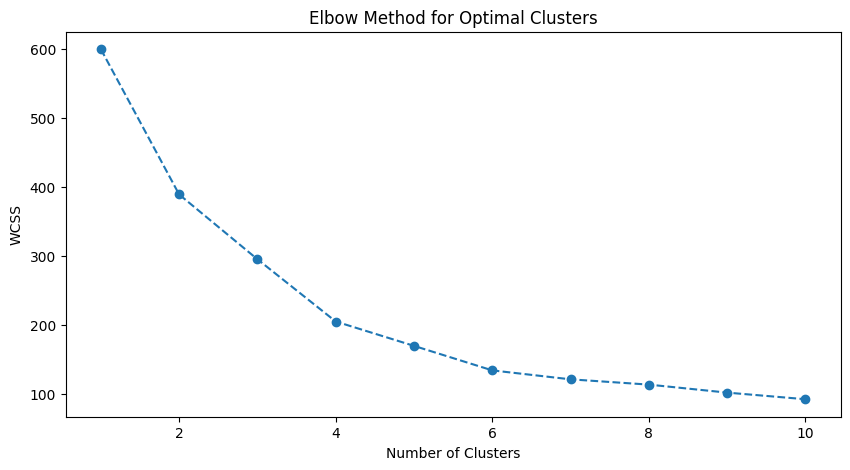

In [16]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

# Plot the Elmbow Curve
plt.figure(figsize = (10, 5))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

<b> Using the Dendrogram to find the optimal number of clusters</b>


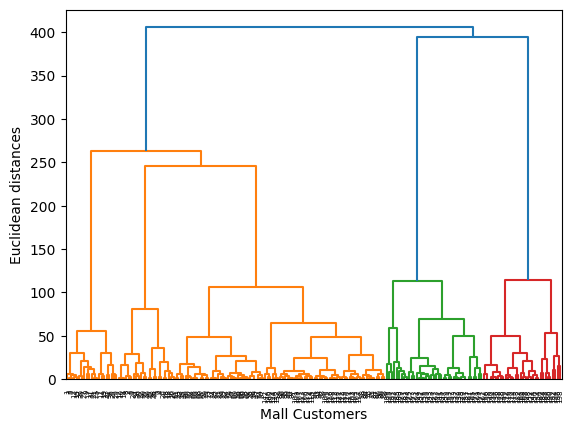

In [ ]:
#Create dendogram

import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))

#set the title of the dendrogram plot
plt.xlabel("Mall Customers")

# Set the label for the y-axis
plt.ylabel('Euclidean distances')

# Display the plot
plt.show()

# 5. Conduct Quality Testing

In [18]:
# Apply K-means clustering with the chosen number of clusters (4 clusters in our cases based on elbow debdrpgram)
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
dataset['Cluster'] = kmeans.fit_predict(x_scaled)


In [19]:
# Evaluate clsutering with a silhoutte score
silhoutte_avg = silhouette_score(x_scaled, dataset['Cluster'])
print(f"Silhoutte Score for the clustering: {silhoutte_avg:.2f}")

Silhoutte Score for the clustering: 0.40


# 6. Review Progress and Adjust

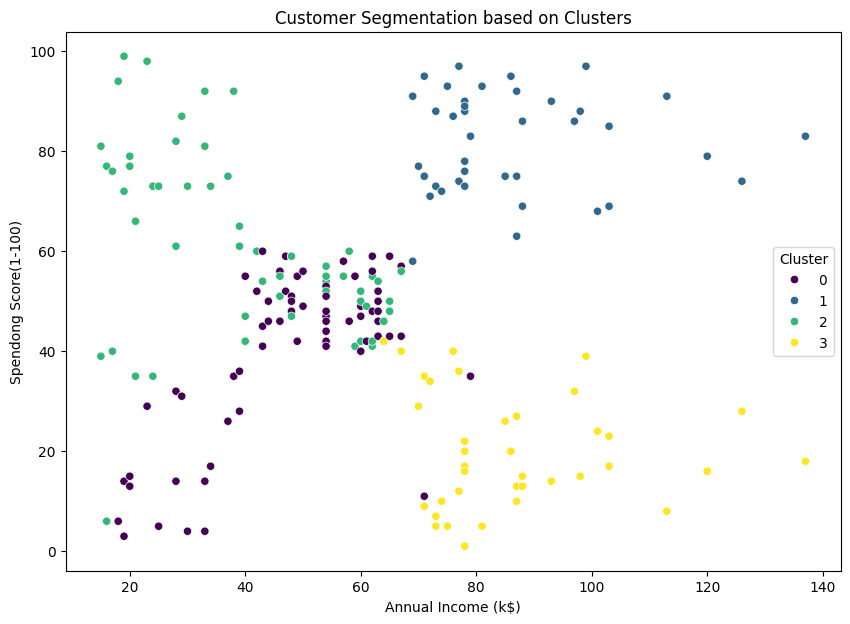

Cluster centroids: [[ 1.08616125 -0.49056525 -0.39717443]
 [-0.42880597  0.97484722  1.21608539]
 [-0.96249203 -0.78476346  0.39202966]
 [ 0.03720536  0.99011499 -1.18875705]]


In [25]:
# Review clustering results visually
plt.figure(figsize = (10,7))
sns.scatterplot(x= 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Cluster', data = dataset, palette = 'viridis')
plt.title("Customer Segmentation based on Clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spendong Score(1-100)")
plt.legend(title = 'Cluster')
plt.show()

# Check clsuter centrioids for further analysis
print('Cluster centroids:', kmeans.cluster_centers_)

# 8. Documentation

In [26]:
# Save the culstered data as a csv file for further analysis
dataset.to_csv('Clustered_Mall_Customers.csv', index = False)

# 3D visualization


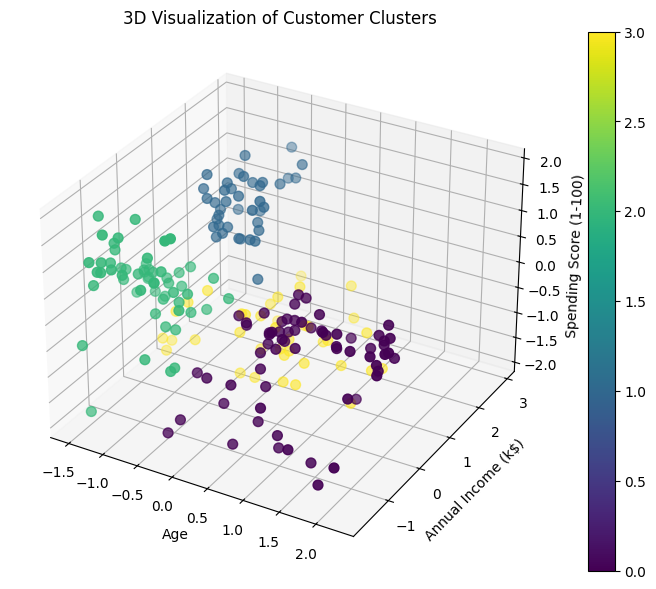

In [28]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x_scaled[:, 0], x_scaled[:, 1], x_scaled[:, 2], c=dataset['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.colorbar(sc)
plt.title('3D Visualization of Customer Clusters')
plt.show()

# 9. Summary and Conclusions:

 * <b> 2D ClUSTER VISUALIZATION :</B>

The 2D scatter plot of Annual Income (k$) vs. Spending Score (1-100) reveals four distinct clusters. Each color represents a different customer segment.

Cluster 0 (Purple): This cluster generally represents customers with moderate income levels and a wide range of spending scores. It could indicate diverse customer behavior, where some are conservative spenders while others are more spendthrift.

Cluster 1 (Blue): This cluster appears to have high-income customers with high spending scores. These customers are likely to be premium, high-value customers who spend a lot.

Cluster 2 (Green): This cluster shows customers with lower annual incomes but higher spending scores. These could be younger or lower-income customers who are more enthusiastic spenders.

Cluster 3 (Yellow): This cluster represents customers with higher income but lower spending scores. These could be practical or cautious spenders who do not spend excessively despite their higher income.

  * <B> 3D CLUSTERING VIUALIZATION:</B>

The 3D plot incorporates Age, Annual Income (k$), and Spending Score (1-100). This visualization provides a deeper view of how age influences cluster formation.
It appears that:

Cluster 1 (Blue): Customers in this cluster are generally older and have high income and spending scores.

Cluster 2 (Green): This cluster shows a range of ages, indicating that customers with low income but high spending scores could vary in age.

Cluster 0 (Purple) and Cluster 3 (Yellow): These clusters span different age groups, showing a mix of income and spending behaviors.

# 10. Reccomendation for Targeted Marketing:


Cluster 1 (Blue): Introduce exclusive, high-value products or services to capitalize on their spending potential.

Cluster 2 (Green): Market aspirational and budget-friendly products that appeal to their enthusiasm for spending despite limited income.

Cluster 3 (Yellow): Consider marketing strategies that highlight premium quality combined with practicality to engage this segment.

Cluster 0 (Purple): A more in-depth analysis might be needed to divide this group into sub-segments for more tailored marketing strategies.

Overall, the clustering analysis effectively segments customers into meaningful groups, providing a solid foundation for targeted marketing and business strategies.






